# Phyloseq tutorial - paper can be found [here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0061217) 

## Allows you to import, store, analyze and graphically display complex phylogenetic sequencing data - this can include 16S and metagenomics and formats can be in Biom, txt, tsv, or csv. This package leverages many of the tools available in R for ecology and phylogenetic analysis (vegan, ade4, ape, picante), while also using advanced/flexible graphic systems (ggplot2) to easily produce publication-quality graphics of complex phylogenetic data. 

In [9]:
library(phyloseq)
library(ggplot2)
library(dplyr)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Changed_name_OTU_table_DNA_BBclub.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_virus.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [60]:
meta_table

,Taxa,Sampling.Dates,Season,Type_of_Nucleic_Acid,Type_of_Nucleic_Acid_NACLOSED,DNA_noCLosed,RNA_noCLosed,Description
AP-DNA-1-Jan-Winter,AP-DNA-1_S1_blast.txt,20 January 2014-17 February 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-1-Jan-Winter
AP-DNA-10-Sep-Fall,AP-DNA-10_S2_blast.txt,29 September 2014-27 October 2014,Fall,DNA,DNA,DNA,NA,AP-DNA-10-Sep-Fall
AP-DNA-11-Oct-Fall,AP-DNA-11_S3_blast.txt,27 October 2014-24 November 2014,Fall,DNA,DNA,DNA,NA,AP-DNA-11-Oct-Fall
AP-DNA-12-Nov-Winter,AP-DNA-12_S4_blast.txt,24 November 2014-23 December 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-12-Nov-Winter
AP-DNA-13-Jan-Winter,AP-DNA-13_S5_blast.txt,05 Janurary 2015-02 February 2015,Winter,DNA,DNA,DNA,NA,AP-DNA-13-Jan-Winter
AP-DNA-14-Dec-Closed,AP-DNA-14_S6_blast.txt,23 December 2014-05 January 2015,Closed,DNA,DNA,NA,NA,AP-DNA-14-Dec-Closed
AP-DNA-15-NA-NA,AP-DNA-15_S7_blast.txt,Unexposed Filter,NA,DNA,DNA,NA,NA,AP-DNA-15-NA-NA
AP-DNA-16-NA-NA,AP-DNA-16_S8_blast.txt,Negative Control,NA,DNA,DNA,NA,NA,AP-DNA-16-NA-NA
AP-DNA-2-Feb-Winter,AP-DNA-2_S9_blast.txt,17 February 2014-17 March 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-2-Feb-Winter
AP-DNA-3-Mar-Spring,AP-DNA-3_S10_blast.txt,17 March 2014- 14 April 2014,Spring,DNA,DNA,DNA,NA,AP-DNA-3-Mar-Spring


In [10]:
meta_table<-data.frame(meta_table)

In [11]:
#Filter out samples not present in meta_table
abund_table<-abund_table[rownames(abund_table) %in% rownames(meta_table),]

In [12]:
#Now load the taxonomy
OTU_taxonomy<-read.csv("changed_viral_nametaxonomy.csv",row.names=1,check.names=FALSE)

In [13]:
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)

In [7]:
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1132 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 1132 taxa by 7 taxonomic ranks ]

# Sequencing depth

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    154    2486    2798    3457    4430    8789 

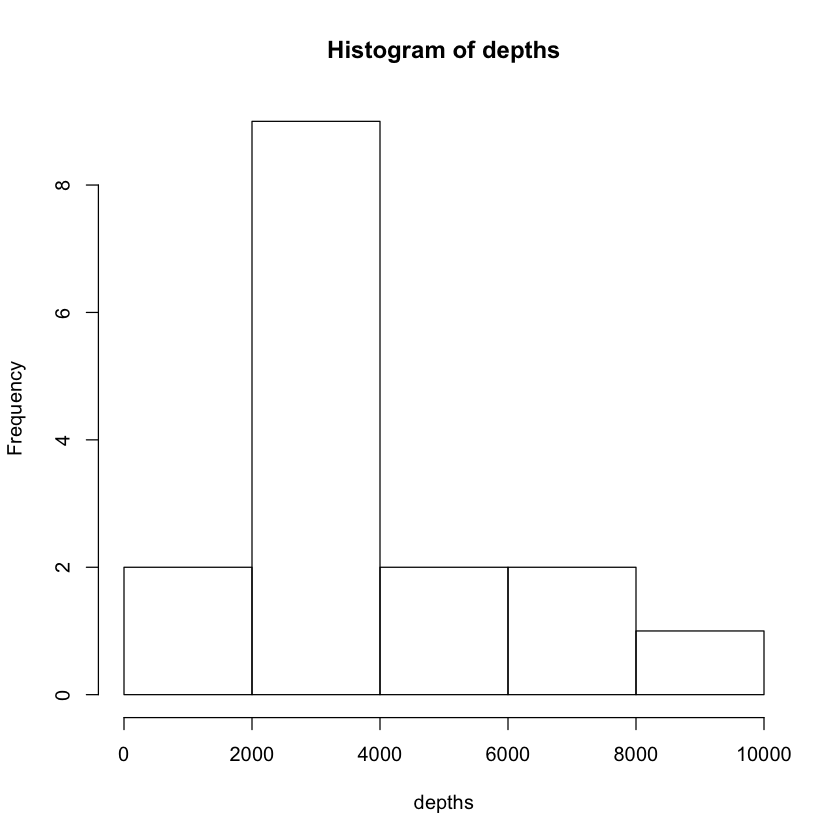

In [8]:
depths <- sample_sums(physeq)
summary(depths)
hist(depths)

# Heatmap top 500 otus all samples

Warning message:
“Transformation introduced infinite values in discrete y-axis”

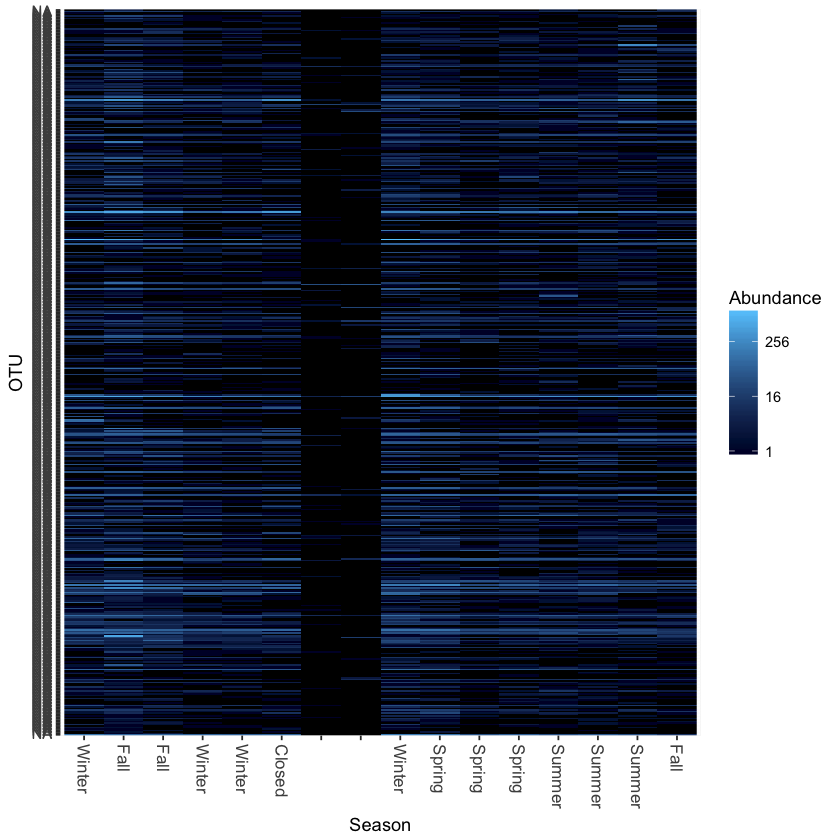

In [42]:
#We now take the 500 most abundant Taxa
physeq_subset<-prune_taxa(names(sort(taxa_sums(physeq), TRUE)[1:500]), physeq)

#Plot heatmap, the dark spots with no name are the negative controls
#pdf('PDF_Phyloseq/heatmap_wblank.pdf')
p<-plot_heatmap(physeq_subset,  method=NULL, sample.label="Season", taxa.label="Phylum")
p
#dev.off()

# Bargraphs

In [12]:
head(sample_data(physeq),1)
summary(sample_data(physeq)$Season)

,Taxa,Sampling.Dates,Season,Type_of_Nucleic_Acid,Type_of_Nucleic_Acid_NACLOSED,DNA_noCLosed,RNA_noCLosed,Description
AP-DNA-1-Jan-Winter,AP-DNA-1_S1_blast.txt,20 January 2014-17 February 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-1-Jan-Winter


Closed  Fall  Spring Summer Winter   NA's 
     1      3      3      3      4      2

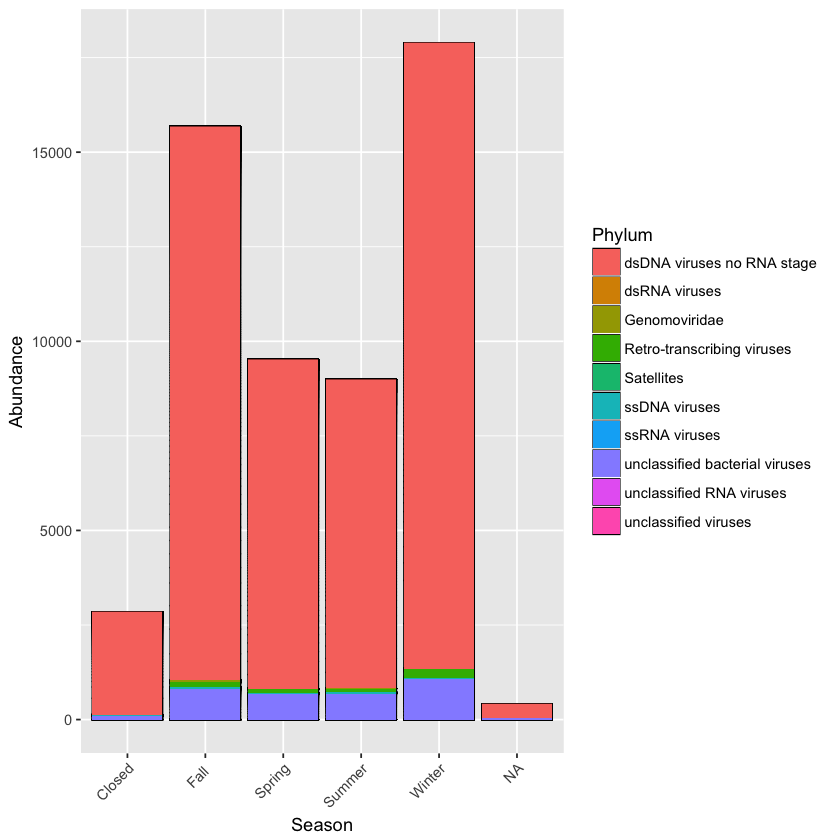

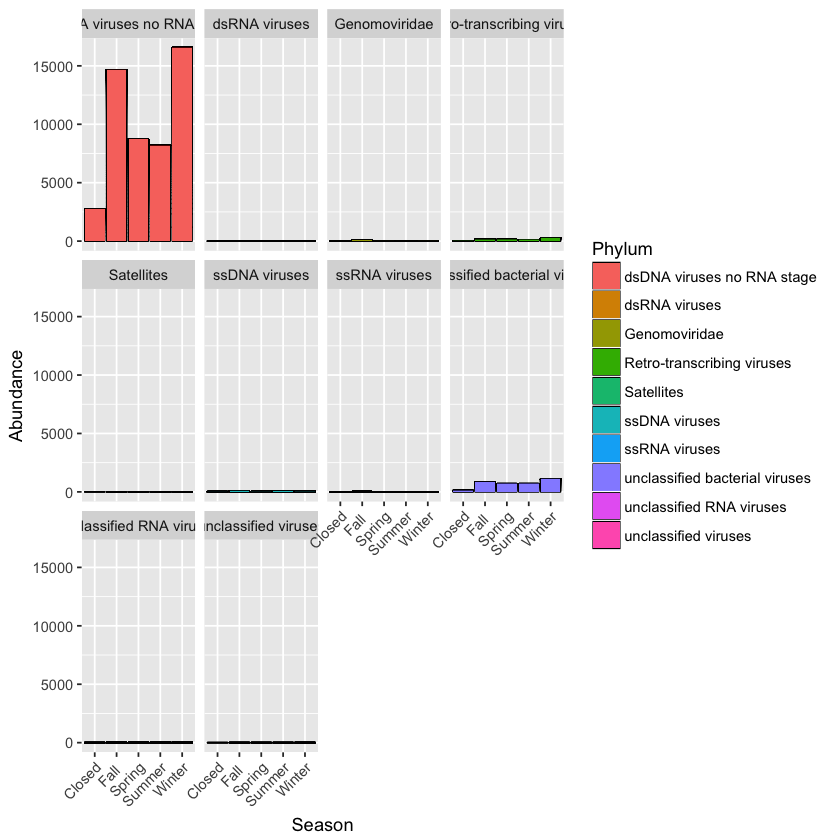

In [15]:
#pdf('PDF_Phyloseq_Seasonal_Viruses/bar_plot_no_NA_RNADNA.pdf')

#dev.off()
p<-plot_bar(physeq, x="Season", fill="Phylum")+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p + geom_bar(stat = "identity", position = "stack")

# subset and 
physeqbarnoA=subset_samples(physeq, Season!='NA')
x<-plot_bar(physeqbarnoA, x="Season", fill="Phylum")+facet_wrap(~Phylum)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
x + geom_bar(stat = "identity", position = "stack")

# Lets remove NA and 'Closed' samples and seperate based on nucleotid type

In [16]:
# remove 'NA' and closed
print ('Original')

summary(sample_data(physeq)$Season ) 
physeq.noNAo=subset_samples(physeq, Season!='NA')# have to remove blanks
physeq.noNA=subset_samples(physeq.noNAo, Season!='Closed')# have to remove blanks

#subset based on nucletide type
physeq.DNA=subset_samples(physeq.noNA, Type_of_Nucleic_Acid !='RNA'  )# have to remove RNA
print('DNA Samples')
summary(sample_data(physeq.DNA)$Season ) 


[1] "Original"


Closed  Fall  Spring Summer Winter   NA's 
     1      3      3      3      4      2

[1] "DNA Samples"


Fall  Spring Summer Winter 
     3      3      3      4

# Let's get percent relative abundance

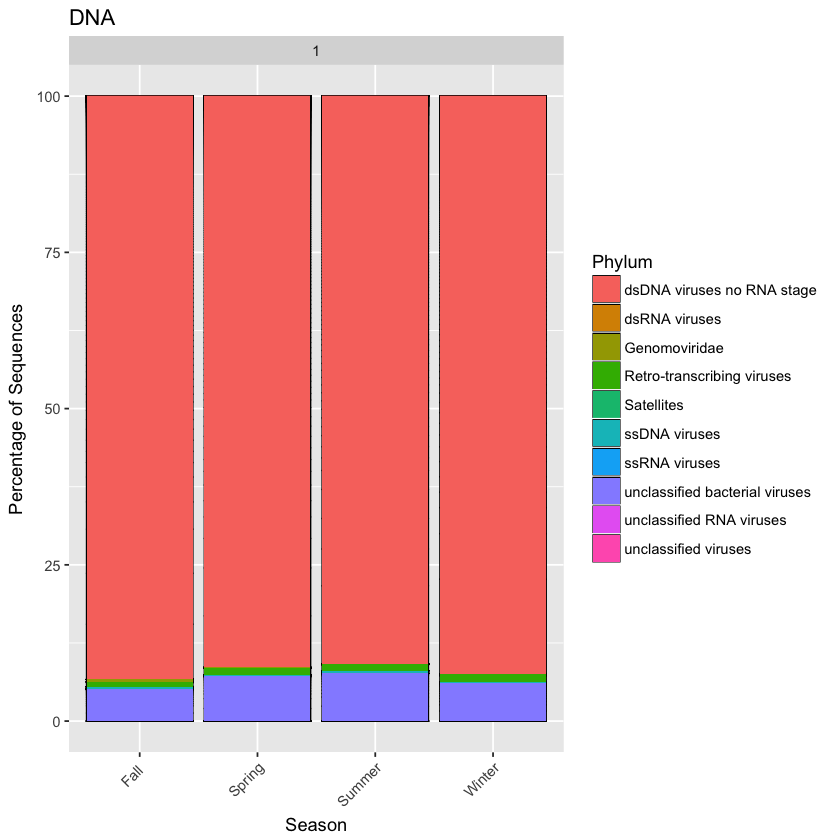

In [15]:
##############
#--------merge samples based on season
#############

#DNA---------
#If you dont merge your percent abudnace will accumulate in a per sample basis
physeq.noNA.rm = merge_samples(physeq.DNA, "Season")

#Repair the merged values associated with each surface after merge. 
sample_data(physeq.noNA.rm)$Season <- levels(sample_data(physeq.noNA)$Season)

#transform to percent total abudnance
physeq.noNA.rm.percent = transform_sample_counts(physeq.noNA.rm, function(x) 100 * x/sum(x))
    
#percent abundance plot
p<-plot_bar(physeq.noNA.rm.percent, x="Season", fill="Phylum",title = "DNA")+facet_wrap(~Type_of_Nucleic_Acid)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p + geom_bar(stat = "identity", position = "stack")+ylab("Percentage of Sequences")



# Can't tell much from the data above. What if we just look at the top 20 abundant viruses

In [16]:
#first we sort the data
TopNOTUsdna = names(sort(taxa_sums(physeq.noNA.rm.percent), TRUE)[1:20])
#prune those OTUs
top15dna = prune_taxa(TopNOTUsdna, physeq.noNA.rm.percent)
top15dna

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]

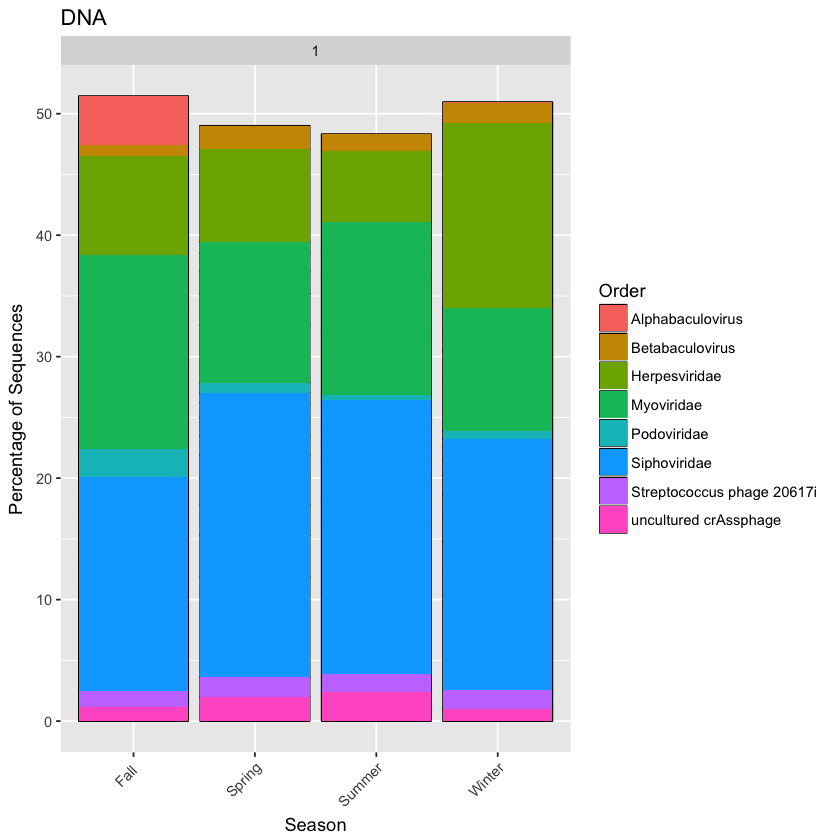

In [17]:
#percent abundance plot
p<-plot_bar(top15dna, x="Season", fill="Order",title = "DNA")+facet_wrap(~Type_of_Nucleic_Acid)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p + geom_bar(stat = "identity", position = "stack")+ylab("Percentage of Sequences")




# Alpha and Beta diversity Metrics
## Data must be normalized and or rarefied prior to analysis

In [17]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(3)

for (i in 1:100) {
  # Subsample
    
  viral.rarefy <- rarefy_even_depth(physeq.noNAo, sample.size = 1300, verbose = FALSE, replace = TRUE)
}

# Alpha Diversity. Estimate alpa diversity by subsampling libraries with replacement to estimate the species abundace of the real population

In [67]:
#RAREFY DATASET TO DO MDS or pcoa or whatever 
library("vegan")
library("grid")
#'Alpha diversity with ANOVA
#'
#'This function calculates alpha diversity of provided community data using
#'selected indices/method(s). It performs pair-wise ANOVA of diversity measures between groups
#'and outputs a plot for each of the selected methods(indices) annotated with significance levels.
#'
#' @param physeq (Required). A \code{phyloseq} object containing merged information of abundance,
#'        taxonomic assignment, sample data including the measured variables and categorical information
#'        of the samples, and / or phylogenetic tree if available.
#' @param method (Required). A list of character strings specifying \code{method} to be used to calculate for alpha diversity 
#'        in the data. Available methods are: "richness", "fisher", "simpson", "shannon" and "evenness".
#' @param grouping_column (Required). A character string specifying the name of a categorical variable containing  grouping information.
#' @return Returns a ggplot object which can further be manipulated further.
#' 
#' @examples 
#' data(pitlatrine)
#' physeq <- pitlatrine
#' p<-plot_anova_diversity(physeq, method = c("richness","simpson"),grouping_column =  "Country",pValueCutoff=0.05)
#' plot_anova_diversity(physeq, method = c("richness","shannon"), grouping_column = "Depth")
#' print(p)
#' 
#' @references \url{http://userweb.eng.gla.ac.uk/umer.ijaz/}, Umer Ijaz, 2015
#' 
#' @author Alfred Ssekagiri \email{assekagiri@gmail.com},Umer Zeeshan Ijaz \email{Umer.Ijaz@glasgow.ac.uk}
#' 
#' @import ggplot2
#' @import grid
#'
#' @export plot_anova_diversity
#' 

plot_anova_diversity <- function(physeq, method, grouping_column,pValueCutoff=0.05)
{
  abund_table <- otu_table(physeq)
  meta_table <- sample_data(physeq)
  
  #get diversity measure using selected methods
  div.df <- alpha_div(physeq,method)
  
  #=add grouping information to alpha diversity measures
  df<-data.frame(div.df,(meta_table[,grouping_column])[as.character(div.df$sample),])
  
  #perform anova of diversity measure between groups
  anova_res <- perform_anova(df,meta_table,grouping_column,pValueCutoff)
  df_pw <- anova_res$df_pw #get pairwise p-values 
  
  #Draw the boxplots
  p<-ggplot(aes_string(x=grouping_column,y="value",color=grouping_column),data=df)
  p<-p+geom_boxplot()+geom_jitter(position = position_jitter(height = 0, width=0))
  p<-p+theme_bw()
  p<-p+theme(axis.text.x = element_text(angle = 90, hjust = 1))
  p<-p+facet_wrap(~measure,scales="free_y",nrow=1)+ylab("Observed Values")+xlab("Samples")
  p<-p+theme(strip.background = element_rect(fill = "white"))+xlab("Groups")
  #This loop will generate the lines and signficances
  
  for(i in 1:dim(df_pw)[1]){
    p<-p+geom_path(inherit.aes=F,aes(x,y),data = data.frame(x = c(which(levels(df[,grouping_column])==as.character(df_pw[i,"from"])),which(levels(df[,grouping_column])==as.character(df_pw[i,"to"]))), y = c(as.numeric(as.character(df_pw[i,"y"])),as.numeric(as.character(df_pw[i,"y"]))), measure=c(as.character(df_pw[i,"measure"]),as.character(df_pw[i,"measure"]))), color="black",lineend = "butt",arrow = arrow(angle = 90, ends = "both", length = unit(0.1, "inches")))
    p<-p+geom_text(inherit.aes=F,aes(x=x,y=y,label=label),data=data.frame(x=(which(levels(df[,grouping_column])==as.character(df_pw[i,"from"]))+which(levels(df[,grouping_column])==as.character(df_pw[i,"to"])))/2,y=as.numeric(as.character(df_pw[i,"y"])),measure=as.character(df_pw[i,"measure"]),label=as.character(cut(as.numeric(as.character(df_pw[i,"p"])),breaks=c(-Inf, 0.001, 0.01, 0.05, Inf),label=c("***", "**", "*", "")))))
  }
  return(p)
}

#'Alpha diversity measure
#'
#'This function calculates alpha diversity of provided community data using
#'selected indices/method. 
#' @param physeq (Required). A \code{phyloseq} object containing merged information of abundance,
#'        taxonomic assignment, sample data including the measured variables and categorical information
#'        of the samples, and / or phylogenetic tree if available.
#' @param method (Required). A list of character strings specifying \code{method} to be used to calculate for alpha diversity 
#'        in the data. Available methods are: "richness", "fisher", "simpson", "shannon" and "evenness".
#' @return It returns a data frame of diversity measure and corresponding indices/methods
#' @references \url{http://userweb.eng.gla.ac.uk/umer.ijaz/}, Umer Ijaz, 2015
#' 
#' @author Alfred Ssekagiri \email{assekagiri@gmail.com},Umer Zeeshan Ijaz \email{Umer.Ijaz@glasgow.ac.uk}
#' 
#' @import vegan
#' @import phyloseq
#'
#'@export alpha_div
#'
alpha_div <- function(physeq,method){
  #==check for validity of selected methods 
  method<- match.arg(method,c("richness", "fisher", "simpson", "shannon", "evenness","pd"), several.ok = TRUE)
  
  abund_table <- otu_table(physeq)
  df <- NULL
  if("richness"%in%method){
    R<-rarefy(abund_table,min(rowSums(abund_table)))
    df_R<-data.frame(sample=names(R),value=R,measure=rep("Richness",length(R)))
    if(is.null(df)){
      df<-df_R} 
    else { 
      df<-rbind(df,df_R)} 
  }
  if("fisher"%in%method){
    alpha <- fisher.alpha(abund_table)
    df_alpha<-data.frame(sample=names(alpha),value=alpha,measure=rep("Fisher alpha",length(alpha)))
    if(is.null(df)){
      df<-df_alpha} 
    else { 
      df<-rbind(df,df_alpha)}
  }
  if("simpson"%in%method){
    simp <- diversity(abund_table, "simpson")
    df_simp<-data.frame(sample=names(simp),value=simp,measure=rep("Simpson",length(simp)))
    if(is.null(df)){
      df<-df_simp} 
    else { 
      df<-rbind(df,df_simp)}
  }
  if("shannon"%in%method){
    H<-diversity(abund_table)
    df_H<-data.frame(sample=names(H),value=H,measure=rep("Shannon",length(H)))
    if(is.null(df)){
      df<-df_H} 
    else { 
      df<-rbind(df,df_H)}
  }
  if("evenness"%in%method){
    H<-diversity(abund_table)
    S <- specnumber(abund_table)
    J <- H/log(S)
    df_J<-data.frame(sample=names(J),value=J,measure=rep("Pielou's evenness",length(J)))
    if(is.null(df)){
      df<-df_J} 
    else { 
      df<-rbind(df,df_J)}
  }
  if("pd"%in%method){
    otu_tree <- phy_tree(physeq)
    PD <- pd(abund_table, otu_tree ,include.root = TRUE)
    df_PD<-data.frame(sample=names(PD),value=PD,measure=rep("PD",length(PD)))
    if(is.null(df)){
      df<-df_PD} 
    else { 
      df<-rbind(df,df_PD)}
  }
  return(df)
}

#'pairwise ANOVA
#'
#'This function performs ANOVA of a given measure in specified groups, in addition it
#'also performs pairwise ANOVA of the measure between possible pairs of levels in the grouping variable. It returns
#'p-values obtained.
#'
#' @param df (Required). A \code{data.frame} containg measures a measure to be analysed.
#' @param meta_table (Required). A data frame containing atleast one variable (grouping variable).
#' @param grouping_column (Required). A character string specifying name of the grouping variable in the supplied meta table.
#' @return It returns a list of two data frames: One being p-values obtained from the pairwise ANOVA of
#' the measure and levels of grouping variable , the other is containing updated measure.
#' @references \url{http://userweb.eng.gla.ac.uk/umer.ijaz/}, Umer Ijaz, 2015
#' 
#' @author Alfred Ssekagiri \email{assekagiri@gmail.com},Umer Zeeshan Ijaz \email{Umer.Ijaz@glasgow.ac.uk}
#' 
#' @import vegan
#' @import phyloseq
#' @import data.table
#'
#'@export perform_anova
#'

perform_anova <- function(df,meta_table,grouping_column,pValueCutoff){
  
  dt<-data.table::data.table(data.frame(df,.group.=meta_table[,grouping_column]))
  #specifying a p-value cutoff for the ggplot2 strips
  pval<-dt[, list(pvalue = sprintf("%.2g", 
                                   tryCatch(summary(aov(value ~ .group.))[[1]][["Pr(>F)"]][1],error=function(e) NULL))), 
           by=list(measure)]
  #Filter out pvals that we are not significant
  pval<-pval[!pval$pvalue=="",]
  pval<-pval[as.numeric(pval$pvalue)<=pValueCutoff,]
  
  #using sapply to generate significances for pval$pvalue using the cut function.
  pval$pvalue<-sapply(as.numeric(pval$pvalue),function(x){as.character(cut(x,breaks=c(-Inf, 0.001, 0.01, pValueCutoff, Inf),label=c("***", "**", "*", "")))})
  
  #Update df$measure to change the measure names if the grouping_column has more than three classes
  if(length(unique(as.character(meta_table[,grouping_column])))>2){
    df$measure<-as.character(df$measure)
    if(dim(pval)[1]>0){
      for(i in seq(1:dim(pval)[1])){
        df[df$measure==as.character(pval[i,measure]),"measure"]=paste(as.character(pval[i,measure]),as.character(pval[i,pvalue]))
      }
    }
    df$measure<-as.factor(df$measure)
  }
  #Get all possible pairwise combination of values in the grouping_column
  s<-combn(unique(as.character(df[,grouping_column])),2)
  
  #df_pw will store the pair-wise p-values
  df_pw<-NULL
  for(k in unique(as.character(df$measure))){
    #We need to calculate the coordinate to draw pair-wise significance lines
    #for this we calculate bas as the maximum value
    bas<-max(df[(df$measure==k),"value"])
    #Calculate increments as 10% of the maximum values
    inc<-0.1*bas
    #Give an initial increment
    bas<-bas+inc
    for(l in 1:dim(s)[2]){
      #Do a pair-wise anova
      tmp<-c(k,s[1,l],s[2,l],bas,paste(sprintf("%.2g",tryCatch(summary(aov(as.formula(paste("value ~",grouping_column)),data=df[(df$measure==k) & (df[,grouping_column]==s[1,l] | df[,grouping_column]==s[2,l]),] ))[[1]][["Pr(>F)"]][1],error=function(e) NULL)),"",sep=""))
      #Ignore if anova fails
      if(!is.na(as.numeric(tmp[length(tmp)]))){
        #Only retain those pairs where the p-values are significant
        if(as.numeric(tmp[length(tmp)])<pValueCutoff){
          if(is.null(df_pw)){df_pw<-tmp}else{df_pw<-rbind(df_pw,tmp)}
          #Generate the next position
          bas<-bas+inc
        }
      }
    }  
  }
  df_pw<-data.frame(row.names=NULL,df_pw)
  names(df_pw)<-c("measure","from","to","y","p")
  out <- list("df_pw"=df_pw, "df"=df)
  return(out)
}



In [19]:
levels(sample_data(viral.rarefy)$Season)

[1] "Closed" "Fall "  "Spring" "Summer" "Winter"

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 609 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 609 taxa by 7 taxonomic ranks ]

Warning message:
“Removed 70 rows containing missing values (geom_errorbar).”

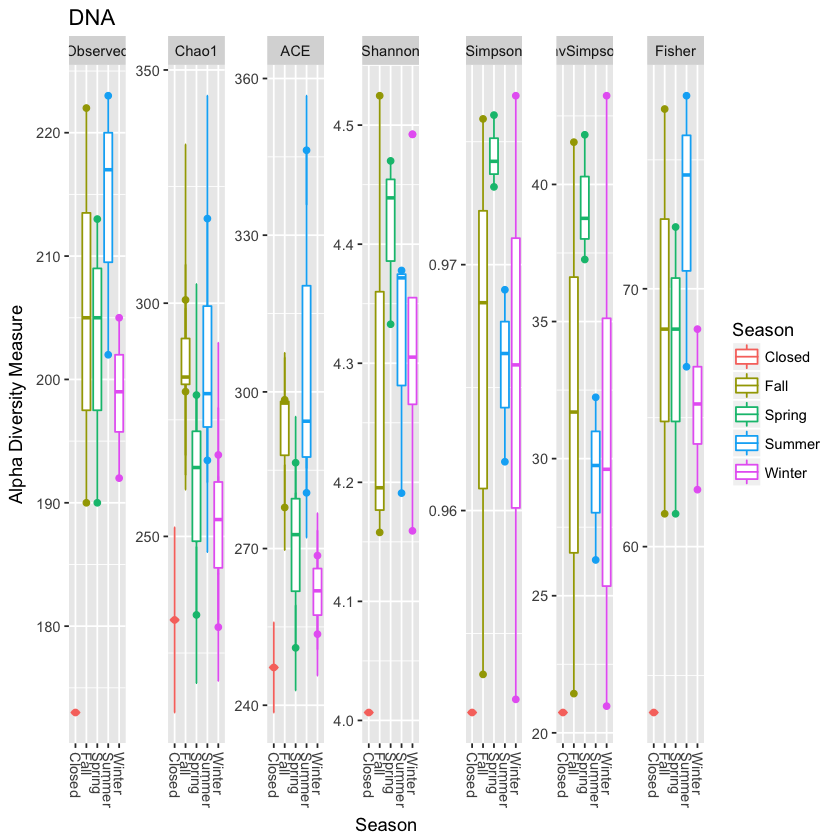

In [20]:
#Alpha diversity
#pdf('PDF_Phyloseq/DNA_RNA_alpha_diversity.pdf')
viral.rarefy
plot_richness(viral.rarefy, x = "Season", color='Season') + geom_boxplot()+ggtitle('DNA')
#dev.off()


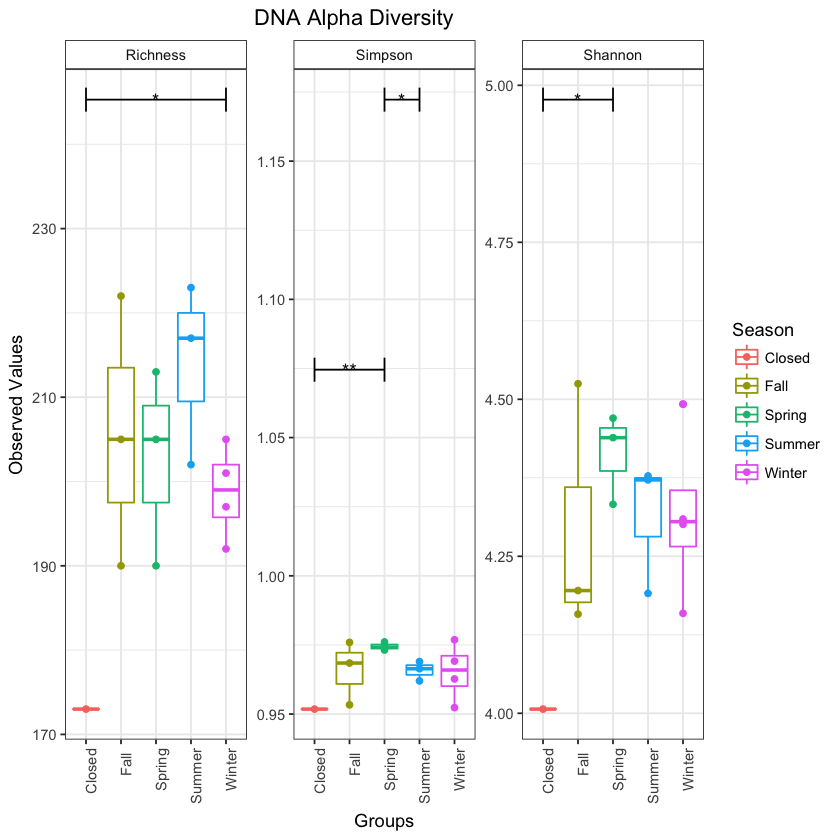

In [57]:
#pdf('PDF_Phyloseq_Seasonal_Viruses/November/DNA_RNA_Alpha_Diversity.pdf')
p<-plot_anova_diversity(viral.rarefy, method = c("richness","simpson", "shannon"),grouping_column =  "Season",pValueCutoff=0.05)+
 ggtitle("                               DNA Alpha Diversity")
print(p)
#Plot richness



# Betadiversity and PERMANOVA


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq   Mean Sq     F N.Perm Pr(>F)
Groups     3 0.0060136 0.0020045 0.864    999  0.518
Residuals  9 0.0208800 0.0023200                    


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq   Mean Sq     F N.Perm Pr(>F)
Groups     3 0.0060136 0.0020045 0.864    999  0.513
Residuals  9 0.0208800 0.0023200                    

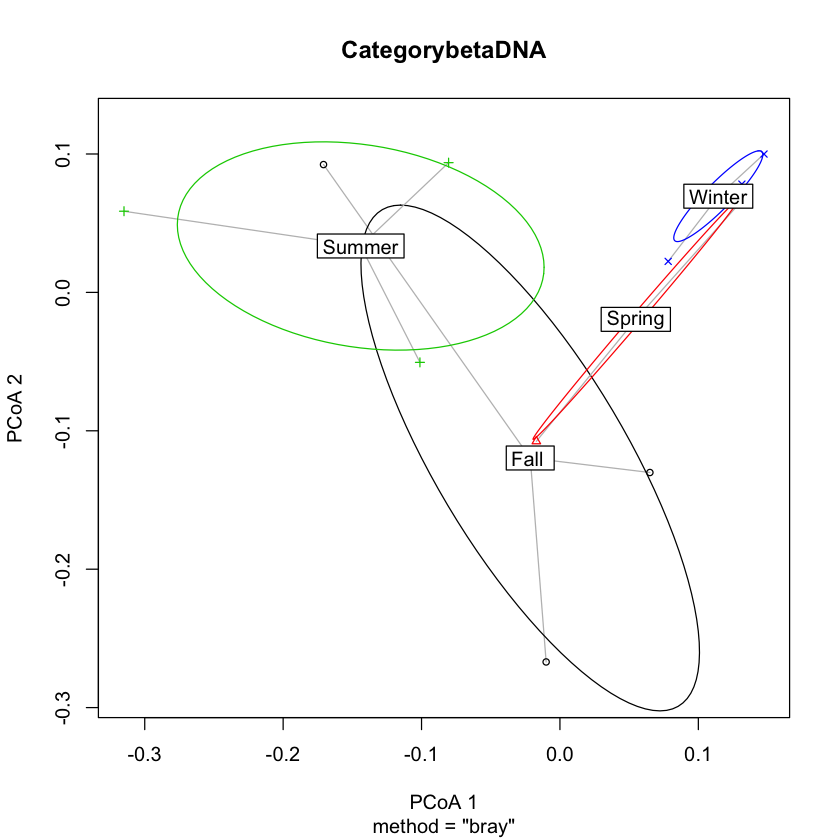

[1] "Taxa"                          "Sampling.Dates"               
[3] "Season"                        "Type_of_Nucleic_Acid"         
[5] "Type_of_Nucleic_Acid_NACLOSED" "DNA_noCLosed"                 
[7] "RNA_noCLosed"                  "Description"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Season,3,0.3337831,0.11126104,1.689149,0.360225,0.00269973
Residuals,9,0.5928131,0.06586812,NA,0.639775,NA
Total,12,0.9265962,NA,NA,1.000000,NA


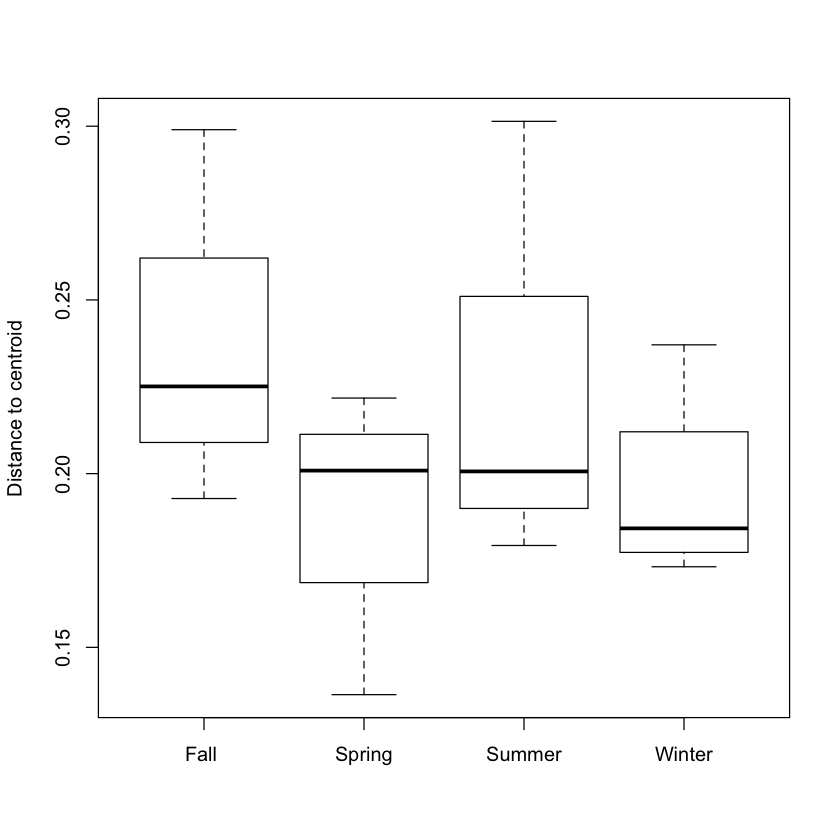

In [58]:
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
viral.rarefy=subset_samples(viral.rarefy, Season != 'Closed')
df = as(sample_data(viral.rarefy), "data.frame")
d = phyloseq::distance(viral.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(viral.rarefy))
beta <- betadisper(d, sampledf$Season)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Season)
permutest(CategorybetaDNA)

plot(CategorybetaDNA, ellipse = TRUE, hull=F)
boxplot(CategorybetaDNA)

#now run permanova
set.seed(2)
GPNMDS = ordinate(viral.rarefy, "PCoA", d)
sample_variables(viral.rarefy)
a=adonis(d ~ Season, as(sample_data(viral.rarefy), "data.frame"), permutations=10000, method='jaccard', weighted=FALSE)
a$aov.tab

# Random Forest

In [21]:
# remove any taxa whose sum is 0
physeq.DNA.Close_0_Filtered <- prune_taxa(taxa_sums(viral.rarefy) > 0,viral.rarefy)
# only keep taxa with a total abudnance of atleast 10
physeq.DNA.Close_5_Filtered <- prune_taxa(taxa_sums(physeq.DNA.Close_0_Filtered) > 10, physeq.DNA.Close_0_Filtered)
physeq.DNA.Close_5_Filtered

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 188 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 188 taxa by 7 taxonomic ranks ]

In [31]:
library(randomForest)
#our predictors will be our table, in this case I gave them random OTU names so that there would be no issues with
#format aka space, characters ect..
predictors <- otu_table(physeq.DNA.Close_5_Filtered)
#set sample data to new variable
physeq.DNA.Close_5_Filtered_sample_Data <- sample_data(physeq.DNA.Close_5_Filtered)
#make sure that new variable is a factor
response <- as.factor(sample_data(physeq.DNA.Close_5_Filtered_sample_Data)$Season)
#make a datafram of our reponse and predictors
rf.data <- data.frame(response,predictors)
set.seed(123)
#run random forest
physeq.DNA.Close_5_Filtered_Classify <- randomForest(response~., data = rf.data, ntree = 200)
print(physeq.DNA.Close_5_Filtered_Classify)


Call:
 randomForest(formula = response ~ ., data = rf.data, ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 13

        OOB estimate of  error rate: 38.46%
Confusion matrix:
       Fall  Spring Summer Winter class.error
Fall       2      0      0      1   0.3333333
Spring     0      1      0      2   0.6666667
Summer     1      1      1      0   0.6666667
Winter     0      0      0      4   0.0000000


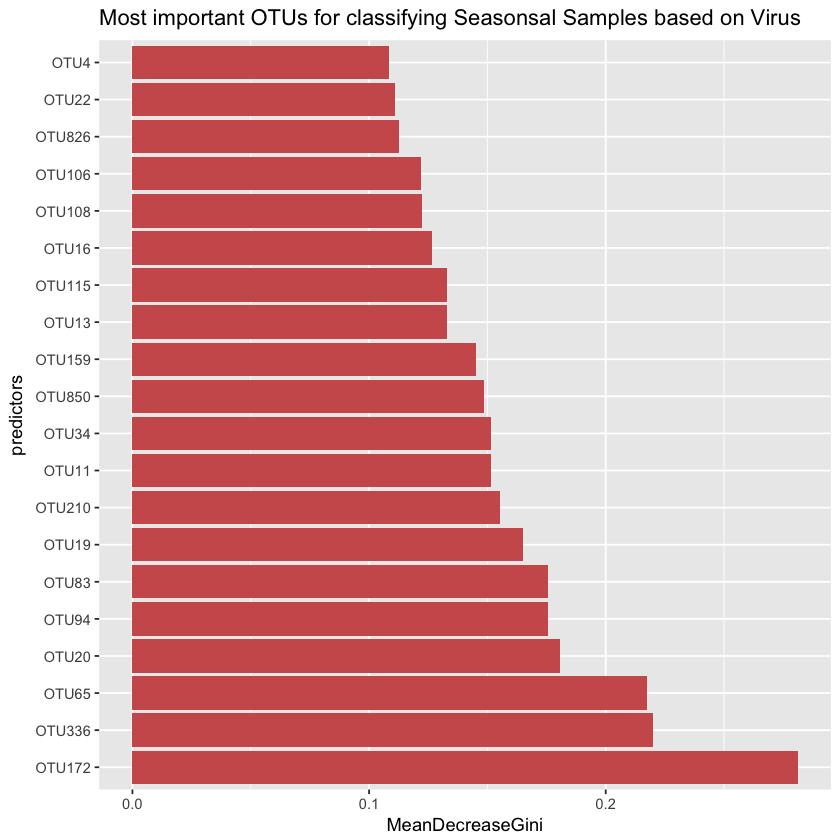

In [32]:
#GRAPH

#relative importance of all our variables
imp <- importance(physeq.DNA.Close_5_Filtered_Classify)
imp <- data.frame(predictors = rownames(imp), imp)
imp.sort <- arrange(imp, desc(imp[,2]))

imp.sort$predictors <- factor(imp.sort$predictors, levels = imp.sort$predictors)

imp.20 <- imp.sort[1:20, ]

ggplot(imp.20, aes(x = predictors, y = MeanDecreaseGini)) +
  geom_bar(stat = "identity", fill = "indianred") + 
  coord_flip() +
  ggtitle("Most important OTUs for classifying Seasonsal Samples based on Virus")

In [191]:
library(knitr)
#-----
# What are those OTUs?
otunames <- imp.20$predictors
r <- rownames(tax_table(physeq.DNA.Close_5_Filtered)) %in% otunames

kable(tax_table(physeq.DNA.Close_5_Filtered)[r, ])

ERROR: Error in eval(expr, envir, enclos): object 'imp.20' not found


In [190]:
DNArf <- subset_taxa(physeq.DNA.Close_5_Filtered, rownames(tax_table(physeq.DNA.Close_5_Filtered)) %in% c('OTU172','OTU336', 'OTU65', 'OTU20', 'OTU94', 'OTU83', 'OTU19', 'OTU201', 'OTU11' ,'OTU34' ,'OTU850' ,'OTU159' ,'OTU13' ,'OTU115','OTU16' ,'OTU108' ,'OTU106','OTU826', 'OTU22', 'OTU4'))


ERROR: Error in eval(expr, envir, enclos): object 'otunames' not found


Warning message:
“Transformation introduced infinite values in discrete y-axis”

Warning message:
“Transformation introduced infinite values in discrete y-axis”

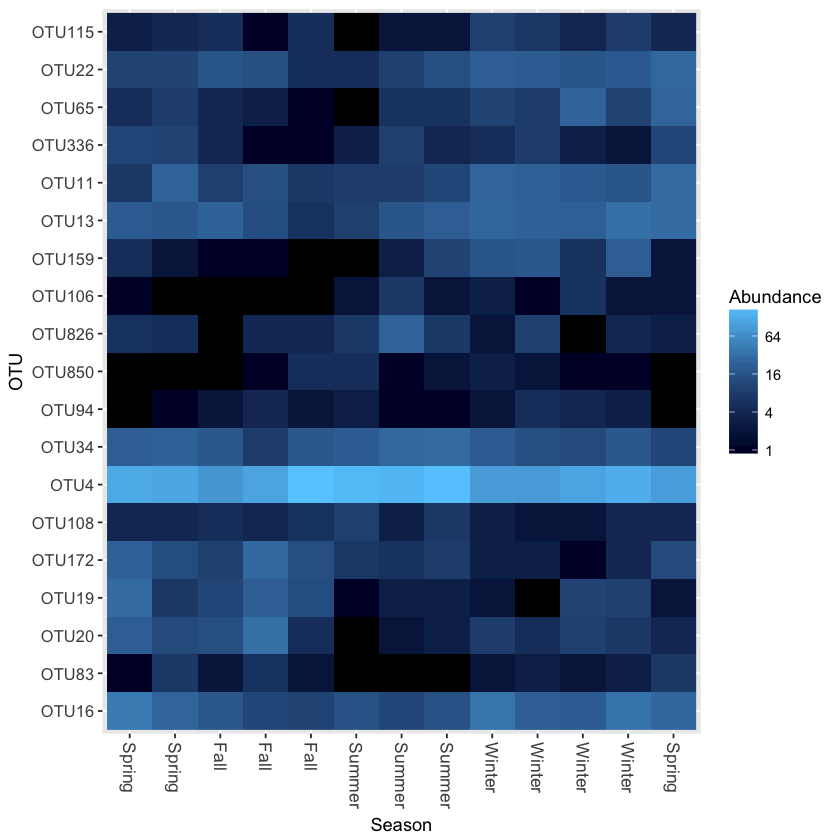

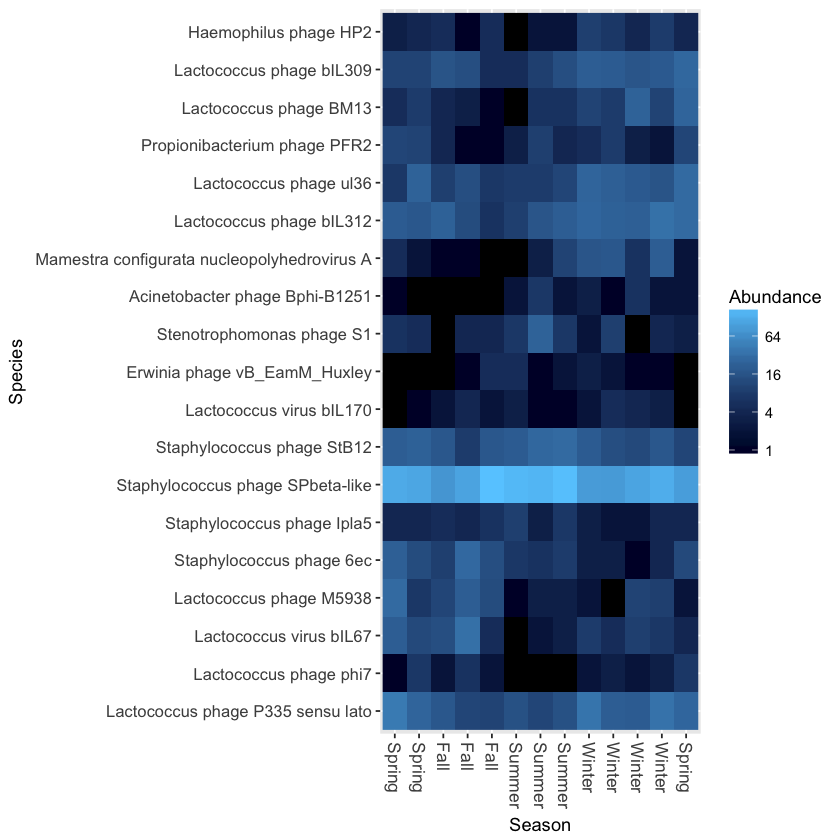

In [35]:
plot_heatmap(DNArf, sample.label="Season")
plot_heatmap(DNArf, "NMDS", "bray", "Season", "Species")

# Kruskall Wallis on RF important OTUs

,X1,X2,X3,X4,X5
AP-DNA-1-Jan-Winter,AP,DNA,1,Jan,Winter
AP-DNA-10-Sep-Fall,AP,DNA,10,Sep,Fall
AP-DNA-11-Oct-Fall,AP,DNA,11,Oct,Fall
AP-DNA-12-Nov-Winter,AP,DNA,12,Nov,Winter
AP-DNA-13-Jan-Winter,AP,DNA,13,Jan,Winter
AP-DNA-2-Feb-Winter,AP,DNA,2,Feb,Winter


c..AP....DNA....1....Jan....Winter..   c..AP....DNA....10....Sep....Fall.. 
                               Winter                                  Fall 
  c..AP....DNA....11....Oct....Fall.. c..AP....DNA....12....Nov....Winter.. 
                                 Fall                                Winter 
c..AP....DNA....13....Jan....Winter..  c..AP....DNA....2....Feb....Winter.. 
                               Winter                                Winter 
 c..AP....DNA....3....Mar....Spring..  c..AP....DNA....4....Apr....Spring.. 
                               Spring                                Spring 
 c..AP....DNA....5....May....Spring..  c..AP....DNA....6....Jun....Summer.. 
                               Spring                                Summer 
c..AP....DNA....7....July....Summer..  c..AP....DNA....8....Aug....Summer.. 
                               Summer                                Summer 
   c..AP....DNA....9....Sep....Fall.. 
                                 Fall 
Levels: Fall Spring Summer Winter

Kruskal-Wallis test for OTU4 1/19; p-value=0.221793308073805
Kruskal-Wallis test for OTU11 2/19; p-value=0.163882513217718
Kruskal-Wallis test for OTU13 3/19; p-value=0.124390234080604
Kruskal-Wallis test for OTU16 4/19; p-value=0.0261616359299213
Kruskal-Wallis test for OTU19 5/19; p-value=0.142573350806143
Kruskal-Wallis test for OTU20 6/19; p-value=0.067593331715724
Kruskal-Wallis test for OTU22 7/19; p-value=0.109209394517787
Kruskal-Wallis test for OTU34 8/19; p-value=0.126969873365425
Kruskal-Wallis test for OTU65 9/19; p-value=0.0465008391219078
Kruskal-Wallis test for OTU83 10/19; p-value=0.0679751472374238
Kruskal-Wallis test for OTU94 11/19; p-value=0.0449695365965011
Kruskal-Wallis test for OTU106 12/19; p-value=0.04541299675051
Kruskal-Wallis test for OTU108 13/19; p-value=0.104509416142959
Kruskal-Wallis test for OTU115 14/19; p-value=0.0541439913124297
Kruskal-Wallis test for OTU159 15/19; p-value=0.0368481852662793
Kruskal-Wallis test for OTU172 16/19; p-value=0.01528370

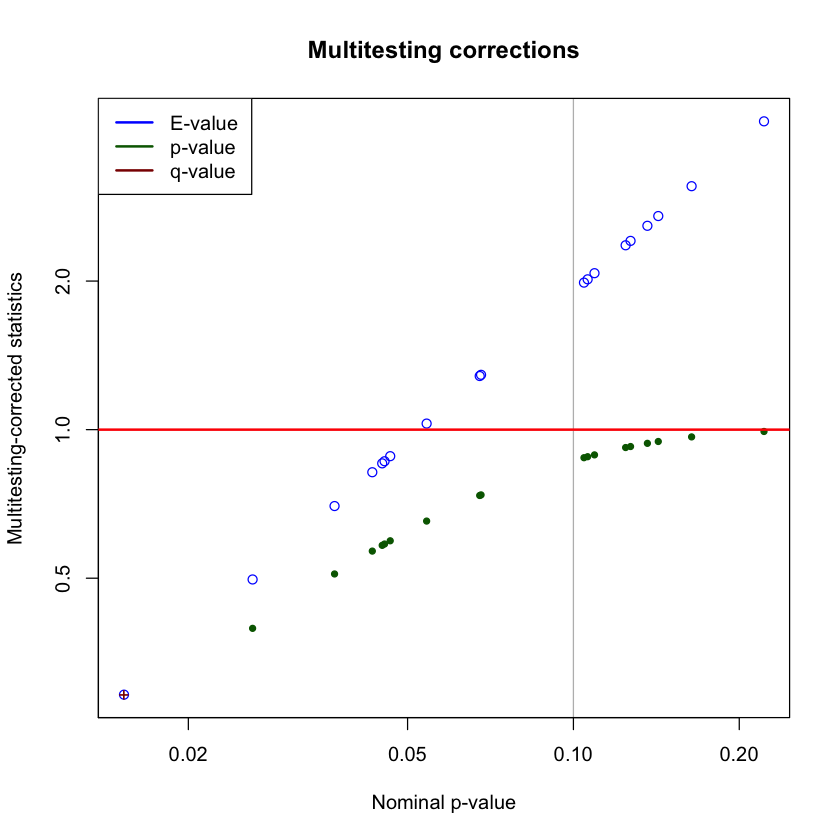

In [36]:
data=as.data.frame(otu_table(DNArf))# changed this
grouping_info<-data.frame(row.names=rownames(data),t(as.data.frame(strsplit(rownames(data),"-"))))

head(grouping_info)
groups=as.factor(grouping_info[,5])
groups


kruskal.wallis.alpha=1
kruskal.wallis.table <- data.frame()
for (i in 1:dim(data)[2]) {
  ks.test <- kruskal.test(data[,i], g=groups)
  # Store the result in the data frame
  kruskal.wallis.table <- rbind(kruskal.wallis.table,
                                data.frame(id=names(data)[i],
                                           p.value=ks.test$p.value
                                ))
  # Report number of values tested
  cat(paste("Kruskal-Wallis test for ",names(data)[i]," ", i, "/", 
            dim(data)[2], "; p-value=", ks.test$p.value,"\n", sep=""))
}
 

kruskal.wallis.table$E.value <- kruskal.wallis.table$p.value * dim(kruskal.wallis.table)[1]
 
kruskal.wallis.table$FWER <- pbinom(q=0, p=kruskal.wallis.table$p.value, 
                                    size=dim(kruskal.wallis.table)[1], lower.tail=FALSE)
 
kruskal.wallis.table <- kruskal.wallis.table[order(kruskal.wallis.table$p.value,
                                                   decreasing=FALSE), ]
kruskal.wallis.table$q.value.factor <- dim(kruskal.wallis.table)[1] / 1:dim(kruskal.wallis.table)[1]
kruskal.wallis.table$q.value <- kruskal.wallis.table$p.value * kruskal.wallis.table$q.value.factor
#pdf("KW_correction.pdf")
plot(kruskal.wallis.table$p.value,
     kruskal.wallis.table$E.value,
     main='Multitesting corrections',
     xlab='Nominal p-value',
     ylab='Multitesting-corrected statistics',
     log='xy',
     col='blue',
     panel.first=grid(col='#BBBBBB',lty='solid'))
lines(kruskal.wallis.table$p.value,
      kruskal.wallis.table$FWER,
      pch=20,col='darkgreen', type='p'
)
lines(kruskal.wallis.table$p.value,
      kruskal.wallis.table$q.value,
      pch='+',col='darkred', type='p'
)
abline(h=kruskal.wallis.alpha, col='red', lwd=2)
legend('topleft', legend=c('E-value', 'p-value', 'q-value'), col=c('blue', 'darkgreen','darkred'), lwd=2,bg='white',bty='o')
#dev.off()
 
last.significant.element <- max(which(kruskal.wallis.table$q.value <= kruskal.wallis.alpha))
selected <- 1:last.significant.element
diff.cat.factor <- kruskal.wallis.table$id[selected]
diff.cat <- as.vector(diff.cat.factor)
 
print(kruskal.wallis.table[selected,])
 



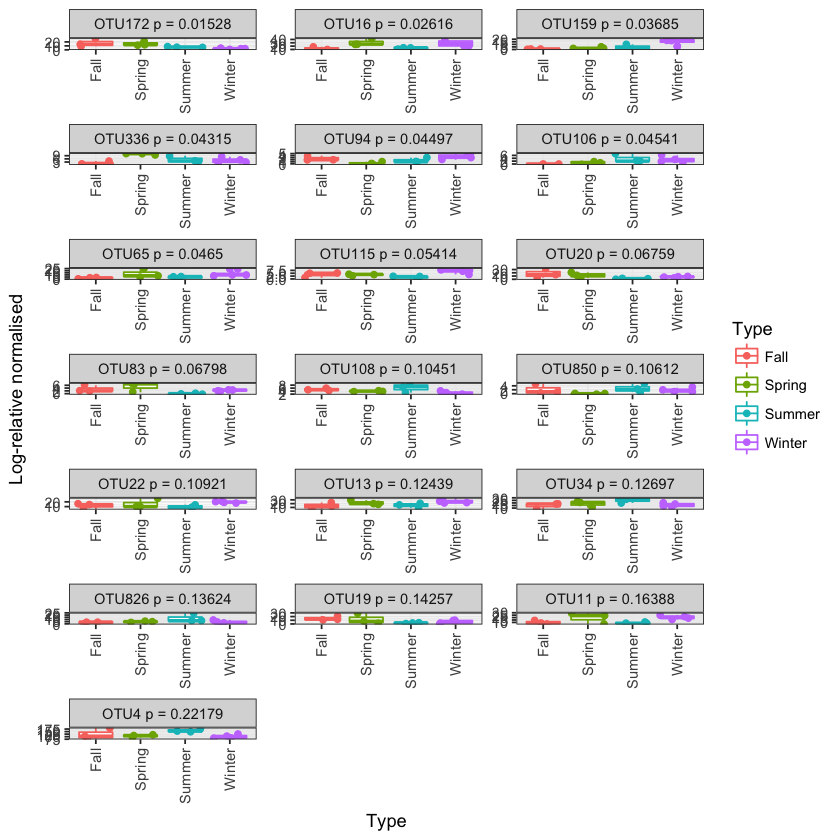

In [37]:

# to use q value instead of p value
#df<-NULL
#for(i in diff.cat){
 # tmp<-data.frame(data[,i],groups,rep(paste(i," q = ",round(kruskal.wallis.table[kruskal.wallis.table$id==i,"q.value"],5),sep=""),dim(data)[1]))
  #if(is.null(df)){df<-tmp} else { df<-rbind(df,tmp)} 
#}
#Now we plot taxa significantly different between the categories
df<-NULL
for(i in diff.cat){
  tmp<-data.frame(data[,i],groups,rep(paste(i," p = ",round(kruskal.wallis.table[kruskal.wallis.table$id==i,"p.value"],5),sep=""),dim(data)[1]))
  if(is.null(df)){df<-tmp} else { df<-rbind(df,tmp)} 
}
colnames(df)<-c("Value","Type","Taxa")
 
p<-ggplot(df,aes(Type,Value,colour=Type))+ylab("Log-relative normalised")
p<-p+geom_boxplot()+geom_jitter()+theme_bw()+
  facet_wrap( ~ Taxa , scales="free", ncol=3)
p<-p+theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))
#pdf("bbpracticeKW_significant.pdf",width=10,height=14)
print(p)
#dev.off()

#  NMDS plot- loos for best subset of taxa on NMDS plot. Allows us to identify the species that are most responsible for the similarity distances between samples.

# BIOBIO: subset of biological variables that best correlate to the overall biological pattern 

In [167]:
sample_data(physeq.DNA.Close_5_Filtered)$Season

[1] Winter Fall   Fall   Winter Winter Closed Winter Spring Spring Spring
[11] Summer Summer Summer Fall  
Levels: Closed Fall  Spring Summer Winter

In [168]:

viral.rarefyclosed=subset_samples(physeq.DNA.Close_5_Filtered, Season!= 'Closed')
otus= otu_table(viral.rarefyclosed)
summary(sample_data(viral.rarefyclosed)$Season)
#write.csv(otus, file='Changed_name_OTU_table_NA_Closed_DNA_rare.csv')

Fall  Spring Summer Winter 
     3      3      3      4

In [170]:

##Only DNA
#
#abund_table<-read.csv("Changed_name_OTU_table_NA_Closed_DNA_rare.csv",row.names=1,check.names=FALSE)
#works
#abund_table<-read.csv("DNA_rare_NA_lclosed.csv",row.names=1,check.names=FALSE)

abund_table=otus







#Transpose the data to have sample names on rows
#abund_table<-t(abund_table)
meta_table<-read.csv("Mapping_file_virus_NAclosed_DNA.csv",row.names=1,check.names=FALSE)
meta_table<-meta_table[rownames(abund_table),]
grouping_info<-data.frame(row.names=rownames(abund_table),t(as.data.frame(strsplit(rownames(abund_table),"-"))))
#grouping_info
grouping_info



,X1,X2,X3,X4,X5
AP-DNA-1-Jan-Winter,AP,DNA,1,Jan,Winter
AP-DNA-10-Sep-Fall,AP,DNA,10,Sep,Fall
AP-DNA-11-Oct-Fall,AP,DNA,11,Oct,Fall
AP-DNA-12-Nov-Winter,AP,DNA,12,Nov,Winter
AP-DNA-13-Jan-Winter,AP,DNA,13,Jan,Winter
AP-DNA-2-Feb-Winter,AP,DNA,2,Feb,Winter
AP-DNA-3-Mar-Spring,AP,DNA,3,Mar,Spring
AP-DNA-4-Apr-Spring,AP,DNA,4,Apr,Spring
AP-DNA-5-May-Spring,AP,DNA,5,May,Spring
AP-DNA-6-Jun-Summer,AP,DNA,6,Jun,Summer


In [3]:
#Parameters
cmethod<-"pearson" #Correlation method to use: pearson, pearman, kendall
fmethod<-"bray" #Fixed distance method: euclidean, manhattan, gower, altGower, canberra, bray, kulczynski, morisita,horn, binomial, and cao
vmethod<-"bray" #Variable distance method: euclidean, manhattan, gower, altGower, canberra, bray, kulczynski, morisita,horn, binomial, and cao
nmethod<-"bray" #NMDS distance method:  euclidean, manhattan, gower, altGower, canberra, bray, kulczynski, morisita,horn, binomial, and cao 

In [36]:
#####
#########################
##########
##################
# ============================================================
# Tutorial on plotting significant taxa and environmental variables on an NMDS plot using ggplot2
# by Umer Zeeshan Ijaz (http://userweb.eng.gla.ac.uk/umer.ijaz)
# =============================================================
 
library(vegan)
library(ggplot2)
library(grid)
 
# This R script is an extension of vegan library's bioenv()
# function and uses the bio.env() and bio.step() of
#	http://menugget.blogspot.co.uk/2011/06/clarke-and-ainsworths-bioenv-and-bvstep.html
#	The original author suggested these functions to overcome
#	the inflexibility of the bioenv() function which uses
#	a similarity matrix based on normalized "euclidean" distance.
# The new functions are given below and implement the following algorithms: 
# Clarke, K. R & Ainsworth, M. 1993. A method of linking multivariate community structure to environmental variables. Marine Ecology Progress Series, 92, 205-219.
# Clarke, K. R., Gorley, R. N., 2001. PRIMER v5: User Manual/Tutorial. PRIMER-E, Plymouth, UK.
# Clarke, K. R., Warwick, R. M., 2001. Changes in Marine Communities: An Approach to Statistical Analysis and Interpretation, 2nd edition. PRIMER-E Ltd, Plymouth, UK.
# Clarke, K. R., Warwick, R. M., 1998. Quantifying structural redundancy in ecological communities. Oecologia, 113:278-289. 
 
bv.step <- function(fix.mat, var.mat, 
                    fix.dist.method="bray", var.dist.method="euclidean", correlation.method="spearman",
                    scale.fix=FALSE, scale.var=TRUE,
                    max.rho=0.95,
                    min.delta.rho=0.001,
                    random.selection=TRUE,
                    prop.selected.var=0.2,
                    num.restarts=10,
                    var.always.include=NULL,
                    var.exclude=NULL,
                    output.best=10
){
 
  if(dim(fix.mat)[1] != dim(var.mat)[1]){stop("fixed and variable matrices must have the same number of rows")}
  if(sum(var.always.include %in% var.exclude) > 0){stop("var.always.include and var.exclude share a variable")}
  require(vegan)
 
  if(scale.fix){fix.mat<-scale(fix.mat)}else{fix.mat<-fix.mat}
  if(scale.var){var.mat<-scale(var.mat)}else{var.mat<-var.mat}
 
  fix.dist <- vegdist(as.matrix(fix.mat), method=fix.dist.method)
 
  #an initial removal phase
  var.dist.full <- vegdist(as.matrix(var.mat), method=var.dist.method)
  full.cor <- suppressWarnings(cor.test(fix.dist, var.dist.full, method=correlation.method))$estimate
  var.comb <- combn(1:ncol(var.mat), ncol(var.mat)-1)
  RES <- data.frame(var.excl=rep(NA,ncol(var.comb)), n.var=ncol(var.mat)-1, rho=NA)
  for(i in 1:dim(var.comb)[2]){
    var.dist <- vegdist(as.matrix(var.mat[,var.comb[,i]]), method=var.dist.method)
    temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
    RES$var.excl[i] <- c(1:ncol(var.mat))[-var.comb[,i]]
    RES$rho[i] <- temp$estimate
  }
  delta.rho <- RES$rho - full.cor
  exclude <- sort(unique(c(RES$var.excl[which(abs(delta.rho) < min.delta.rho)], var.exclude)))
 
  if(random.selection){
    num.restarts=num.restarts
    prop.selected.var=prop.selected.var
    prob<-rep(1,ncol(var.mat))
    if(prop.selected.var< 1){
      prob[exclude]<-0
    }
    n.selected.var <- min(sum(prob),prop.selected.var*dim(var.mat)[2])
  } else {
    num.restarts=1
    prop.selected.var=1  
    prob<-rep(1,ncol(var.mat))
    n.selected.var <- min(sum(prob),prop.selected.var*dim(var.mat)[2])
  }
 
  RES_TOT <- c()
  for(i in 1:num.restarts){
    step=1
    RES <- data.frame(step=step, step.dir="F", var.incl=NA, n.var=0, rho=0)
    attr(RES$step.dir, "levels") <- c("F","B")
    best.comb <- which.max(RES$rho)
    best.rho <- RES$rho[best.comb]
    delta.rho <- Inf
    selected.var <- sort(unique(c(sample(1:dim(var.mat)[2], n.selected.var, prob=prob), var.always.include)))
    while(best.rho < max.rho & delta.rho > min.delta.rho & RES$n.var[best.comb] < length(selected.var)){
      #forward step
      step.dir="F"
      step=step+1
      var.comb <- combn(selected.var, RES$n.var[best.comb]+1, simplify=FALSE)
      if(RES$n.var[best.comb] == 0){
        var.comb.incl<-1:length(var.comb)
      } else {
        var.keep <- as.numeric(unlist(strsplit(RES$var.incl[best.comb], ",")))
        temp <- NA*1:length(var.comb)
        for(j in 1:length(temp)){
          temp[j] <- all(var.keep %in% var.comb[[j]]) 
        }
        var.comb.incl <- which(temp==1)
      }
 
      RES.f <- data.frame(step=rep(step, length(var.comb.incl)), step.dir=step.dir, var.incl=NA, n.var=RES$n.var[best.comb]+1, rho=NA)
      for(f in 1:length(var.comb.incl)){
        var.incl <- var.comb[[var.comb.incl[f]]]
        var.incl <- var.incl[order(var.incl)]
        var.dist <- vegdist(as.matrix(var.mat[,var.incl]), method=var.dist.method)
        temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
        RES.f$var.incl[f] <- paste(var.incl, collapse=",")
        RES.f$rho[f] <- temp$estimate
      }
 
      last.F <- max(which(RES$step.dir=="F"))
      RES <- rbind(RES, RES.f[which.max(RES.f$rho),])
      best.comb <- which.max(RES$rho)
      delta.rho <- RES$rho[best.comb] - best.rho 
      best.rho <- RES$rho[best.comb]
 
      if(best.comb == step){
        while(best.comb == step & RES$n.var[best.comb] > 1){
          #backward step
          step.dir="B"
          step <- step+1
          var.keep <- as.numeric(unlist(strsplit(RES$var.incl[best.comb], ",")))
          var.comb <- combn(var.keep, RES$n.var[best.comb]-1, simplify=FALSE)
          RES.b <- data.frame(step=rep(step, length(var.comb)), step.dir=step.dir, var.incl=NA, n.var=RES$n.var[best.comb]-1, rho=NA)
          for(b in 1:length(var.comb)){
            var.incl <- var.comb[[b]]
            var.incl <- var.incl[order(var.incl)]
            var.dist <- vegdist(as.matrix(var.mat[,var.incl]), method=var.dist.method)
            temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
            RES.b$var.incl[b] <- paste(var.incl, collapse=",")
            RES.b$rho[b] <- temp$estimate
          }
          RES <- rbind(RES, RES.b[which.max(RES.b$rho),])
          best.comb <- which.max(RES$rho)
          best.rho<- RES$rho[best.comb]
        }
      } else {
        break()
      }
 
    }
 
    RES_TOT <- rbind(RES_TOT, RES[2:dim(RES)[1],])
    print(paste(round((i/num.restarts)*100,3), "% finished"))
  }
 
  RES_TOT <- unique(RES_TOT[,3:5])
 
 
  if(dim(RES_TOT)[1] > output.best){
    order.by.best <- RES_TOT[order(RES_TOT$rho, decreasing=TRUE)[1:output.best],]
  } else {
    order.by.best <-  RES_TOT[order(RES_TOT$rho, decreasing=TRUE), ]
  }
  rownames(order.by.best)<-NULL
 
  order.by.i.comb <- c()
  for(i in 1:length(selected.var)){
    f1 <- which(RES_TOT$n.var==i)
    f2 <- which.max(RES_TOT$rho[f1])
    order.by.i.comb <- rbind(order.by.i.comb, RES_TOT[f1[f2],])
  }
  rownames(order.by.i.comb)<-NULL
 
  if(length(exclude)<1){var.exclude=NULL} else {var.exclude=exclude}
  out <- list(
    order.by.best=order.by.best,
    order.by.i.comb=order.by.i.comb,
    best.model.vars=paste(colnames(var.mat)[as.numeric(unlist(strsplit(order.by.best$var.incl[1], ",")))], collapse=","),
    best.model.rho=order.by.best$rho[1],
    var.always.include=var.always.include,
    var.exclude=var.exclude
  )
  out
 
}
 
bio.env <- function(fix.mat, var.mat, 
                    fix.dist.method="bray", var.dist.method="euclidean", correlation.method="spearman",
                    scale.fix=FALSE, scale.var=TRUE,
                    output.best=10,
                    var.max=ncol(var.mat)
){
  if(dim(fix.mat)[1] != dim(var.mat)[1]){stop("fixed and variable matrices must have the same number of rows")}
  if(var.max > dim(var.mat)[2]){stop("var.max cannot be larger than the number of variables (columns) in var.mat")}
 
  require(vegan)
 
  combn.sum <- sum(factorial(ncol(var.mat))/(factorial(1:var.max)*factorial(ncol(var.mat)-1:var.max)))
 
  if(scale.fix){fix.mat<-scale(fix.mat)}else{fix.mat<-fix.mat}
  if(scale.var){var.mat<-scale(var.mat)}else{var.mat<-var.mat}
  fix.dist <- vegdist(fix.mat, method=fix.dist.method)
  RES_TOT <- c()
  best.i.comb <- c()
  iter <- 0
  for(i in 1:var.max){
    var.comb <- combn(1:ncol(var.mat), i, simplify=FALSE)
    RES <- data.frame(var.incl=rep(NA, length(var.comb)), n.var=i, rho=0)
    for(f in 1:length(var.comb)){
      iter <- iter+1
      var.dist <- vegdist(as.matrix(var.mat[,var.comb[[f]]]), method=var.dist.method)
      temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
      RES$var.incl[f] <- paste(var.comb[[f]], collapse=",")
      RES$rho[f] <- temp$estimate
      if(iter %% 100 == 0){print(paste(round(iter/combn.sum*100, 3), "% finished"))}
    }
 
    order.rho <- order(RES$rho, decreasing=TRUE)
    best.i.comb <- c(best.i.comb, RES$var.incl[order.rho[1]])
    if(length(order.rho) > output.best){
      RES_TOT <- rbind(RES_TOT, RES[order.rho[1:output.best],])
    } else {
      RES_TOT <- rbind(RES_TOT, RES)
    }
  }
  rownames(RES_TOT)<-NULL
 
  if(dim(RES_TOT)[1] > output.best){
    order.by.best <- order(RES_TOT$rho, decreasing=TRUE)[1:output.best]
  } else {
    order.by.best <- order(RES_TOT$rho, decreasing=TRUE)
  }
  OBB <- RES_TOT[order.by.best,]
  rownames(OBB) <- NULL
 
  order.by.i.comb <- match(best.i.comb, RES_TOT$var.incl)
  OBC <- RES_TOT[order.by.i.comb,]
  rownames(OBC) <- NULL
 
  out <- list(
    order.by.best=OBB,
    order.by.i.comb=OBC,
    best.model.vars=paste(colnames(var.mat)[as.numeric(unlist(strsplit(OBB$var.incl[1], ",")))], collapse=",") ,
    best.model.rho=OBB$rho[1]
  )
  out
}

In [171]:
res.bv.step.biobio <- bv.step(wisconsin(abund_table), wisconsin(abund_table), 
                              fix.dist.method=fmethod, var.dist.method=vmethod,correlation.method=cmethod,
                              scale.fix=FALSE, scale.var=FALSE, 
                              max.rho=0.95, min.delta.rho=0.001,
                              random.selection=TRUE,
                              prop.selected.var=0.5,
                              num.restarts=10,
                              output.best=10,
                              var.always.include=NULL) 

Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "10 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "20 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "30 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "40 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "50 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "60 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "70 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "80 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "90 % finished"


Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“missing values in results”Warning message in vegdist(as.matrix(var.mat[, var.incl]), method = var.dist.method):
“you have empty rows: their dissimilarities may be meaningless in method “bra

[1] "100 % finished"


In [172]:
taxaNames<-colnames(abund_table)
bestTaxaFit<-""
for(i in (1:length(res.bv.step.biobio$order.by.best$var.incl)))
{
  bestTaxaFit[i]<-paste(paste(taxaNames[as.numeric(unlist(strsplit(res.bv.step.biobio$order.by.best$var.incl[i], split=",")))],collapse=' + '), " = ",res.bv.step.biobio$order.by.best$rho[i],sep="")
}
bestTaxaFit<-data.frame(bestTaxaFit)
colnames(bestTaxaFit)<-"Best combination of taxa with similarity score"
bestTaxaFit

Best combination of taxa with similarity score
OTU30 + OTU76 + OTU80 + OTU101 + OTU120 + OTU130 + OTU241 + OTU333 + OTU451 + OTU640 + OTU883 = 0.661729809863126
OTU30 + OTU76 + OTU80 + OTU101 + OTU120 + OTU130 + OTU241 + OTU333 + OTU451 + OTU596 + OTU640 + OTU883 = 0.661493137814709
OTU30 + OTU76 + OTU80 + OTU101 + OTU120 + OTU130 + OTU241 + OTU333 + OTU451 + OTU883 = 0.653924981729704
OTU30 + OTU76 + OTU101 + OTU120 + OTU130 + OTU241 + OTU333 + OTU451 + OTU640 + OTU883 = 0.645733669169395
OTU30 + OTU76 + OTU101 + OTU120 + OTU130 + OTU241 + OTU333 + OTU451 + OTU883 = 0.640608928657951
OTU30 + OTU76 + OTU101 + OTU120 + OTU130 + OTU333 + OTU451 + OTU640 + OTU883 = 0.633049784053492
OTU30 + OTU101 + OTU120 + OTU130 + OTU333 + OTU451 + OTU640 + OTU883 = 0.630786911018857
OTU30 + OTU101 + OTU120 + OTU130 + OTU333 + OTU451 + OTU640 = 0.622116916243356
OTU30 + OTU101 + OTU130 + OTU333 + OTU451 + OTU640 = 0.60398898708167
OTU30 + OTU130 + OTU333 + OTU451 + OTU640 = 0.596628037918265


In [173]:
MDS_res=metaMDS(abund_table, distance = nmethod, k = 2, trymax = 50)
 
bio.keep <- as.numeric(unlist(strsplit(res.bv.step.biobio$order.by.best$var.incl[1], ",")))
bio.fit <- envfit(MDS_res, abund_table[,bio.keep,drop=F], perm = 999)
bio.fit
bio.keep

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1060909 
Run 1 stress 0.1060909 
... Procrustes: rmse 0.0001256879  max resid 0.0003133144 
... Similar to previous best
Run 2 stress 0.1060909 
... New best solution
... Procrustes: rmse 3.384957e-05  max resid 8.430094e-05 
... Similar to previous best
Run 3 stress 0.1805321 
Run 4 stress 0.1060909 
... Procrustes: rmse 3.897432e-05  max resid 9.776825e-05 
... Similar to previous best
Run 5 stress 0.1060909 
... Procrustes: rmse 0.0001485045  max resid 0.0003711773 
... Similar to previous best
Run 6 stress 0.1060909 
... Procrustes: rmse 5.00856e-06  max resid 1.18791e-05 
... Similar to previous best
Run 7 stress 0.1060909 
... New best solution
... Procrustes: rmse 8.556025e-06  max resid 1.890113e-05 
... Similar to previous best
Run 8 stress 0.1060909 
... Procrustes: rmse 9.286942e-06  max resid 1.776707e-05 
... Similar to previous best
Run 9 stress 0.1060909 
... Procrustes: rmse 9.241144e-05  max res


***VECTORS

          NMDS1    NMDS2     r2 Pr(>r)  
OTU30  -0.32509 -0.94568 0.5664  0.016 *
OTU76  -0.96424  0.26502 0.0778  0.649  
OTU80   0.16341 -0.98656 0.4809  0.029 *
OTU101  0.97420  0.22568 0.5483  0.011 *
OTU120  0.96059  0.27797 0.0145  0.936  
OTU130  0.10248 -0.99474 0.0550  0.755  
OTU241 -0.83923  0.54377 0.3740  0.088 .
OTU333 -0.34156  0.93986 0.2554  0.213  
OTU451 -0.93783  0.34709 0.2432  0.273  
OTU640 -0.54848  0.83617 0.3229  0.148  
OTU883  0.26005  0.96559 0.0939  0.622  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999



[1]  20  58  61  78  90  96 123 135 143 157 176

In [175]:
#Get site information
df<-scores(MDS_res,display=c("sites"))
 
#Add grouping information
df<-data.frame(df,Type=grouping_info[rownames(df),5])
 
#Get the vectors for bioenv.fit
df_biofit<-scores(bio.fit,display=c("vectors"))
df_biofit<-df_biofit*vegan:::ordiArrowMul(df_biofit)
df_biofit<-as.data.frame(df_biofit)

In [176]:
#ellipses
#First of all, I added column group to your NMDS data frame.
NMDS = data.frame(MDS1 = MDS_res$points[,1], MDS2 = MDS_res$points[,2],group=grouping_info[rownames(df),5])
group=grouping_info[rownames(df),5]
#NMDS
#Second data frame contains mean MDS1 and MDS2 values for each group and it will be used to show group names on plot
NMDS.mean=aggregate(NMDS[,1:2],list(group=group),mean)
NMDS.mean

group,MDS1,MDS2
Fall,0.11246916,-0.045161043
Spring,-0.10323763,-0.009601597
Summer,0.01802745,0.111234644
Winter,-0.02044423,-0.042354004


In [177]:
#Data frame df_ell contains values to show ellipses. It is calculated with function veganCovEllipse which is hidden 
#in vegan package. This function is applied to each level of NMDS (group) and it uses also function cov.wt to 
#calculate covariance matrix.
veganCovEllipse<-function (cov, center = c(0, 0), scale = 1, npoints = 100) 
  {
    theta <- (0:npoints) * 2 * pi/npoints
    Circle <- cbind(cos(theta), sin(theta))
    t(center + scale * t(Circle %*% chol(cov)))
  }

  df_ell <- data.frame()
  for(g in levels(NMDS$group)){
    df_ell <- rbind(df_ell, cbind(as.data.frame(with(NMDS[NMDS$group==g,],
                    veganCovEllipse(cov.wt(cbind(MDS1,MDS2),wt=rep(1/length(MDS1),length(MDS1)))$cov,center=c(mean(MDS1),mean(MDS2)))))
                    ,group=g))
  }



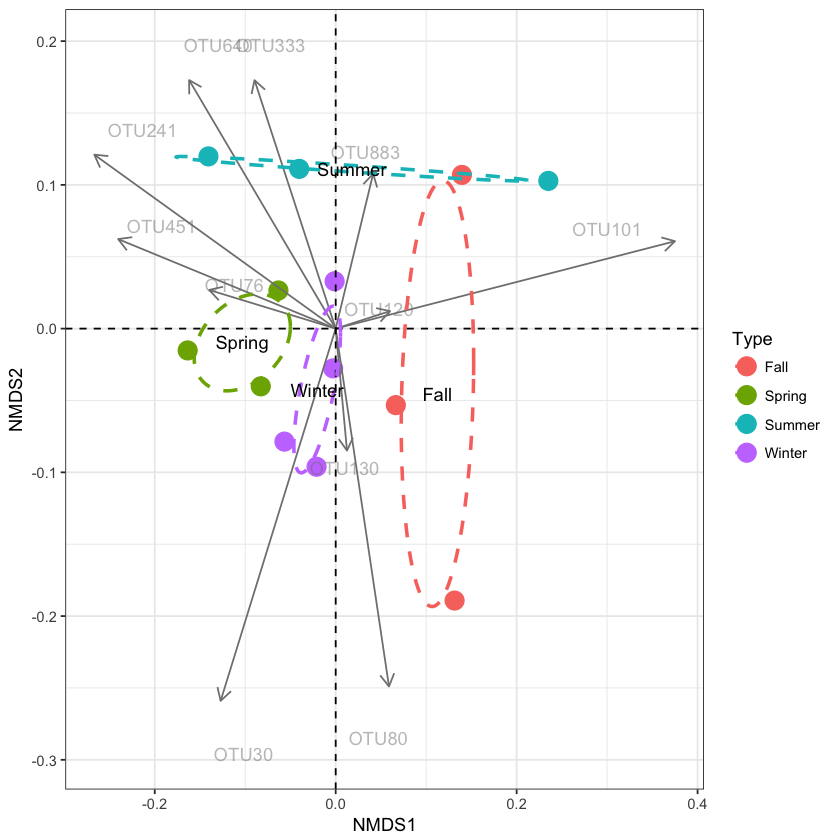

In [189]:
#Draw samples
p<-ggplot()
p<-p+geom_point(data=df,aes(NMDS1,NMDS2,colour=Type),size = 5)
#Draw taxas
p<-p+geom_segment(data=df_biofit, aes(x = 0, y = 0, xend = NMDS1*.5, yend = NMDS2*.35),
                 arrow = arrow(length = unit(0.3, "cm")),color="#808080",alpha=1)
 
p<-p+geom_text(data=as.data.frame(df_biofit*.4),aes(NMDS1, NMDS2, label = rownames(df_biofit)),color="#808080",alpha=0.5)
#Draw environmental variables
#p<-p+geom_segment(data=df_envfit, aes(x = 0, y = 0, xend = NMDS1, yend = NMDS2),
 #                 arrow = arrow(length = unit(0.2, "cm")),color="#4C005C",alpha=0.5)
 
#p<-p+geom_text(data=as.data.frame(df_envfit*1.1),aes(NMDS1, NMDS2, label = rownames(df_envfit)),color="#4C005C",alpha=0.5)

p<-p+theme_bw() +geom_hline(yintercept=0,linetype=2) + 
  geom_vline(xintercept=0,linetype=2) + geom_path(data=df_ell, aes(x=MDS1, y=MDS2,colour=group), size=1, linetype=2)+
    annotate("text",x=NMDS.mean$MDS1,y=NMDS.mean$MDS2,label=NMDS.mean$group)
p

In [ ]:
# ============================================================
# Tutorial on plotting significant taxa and environmental variables on an NMDS plot using ggplot2
# by Umer Zeeshan Ijaz (http://userweb.eng.gla.ac.uk/umer.ijaz)
# =============================================================
 

library(vegan)
library(ggplot2)
library(grid)
 
# This R script is an extension of vegan library's bioenv()
# function and uses the bio.env() and bio.step() of
#	http://menugget.blogspot.co.uk/2011/06/clarke-and-ainsworths-bioenv-and-bvstep.html
#	The original author suggested these functions to overcome
#	the inflexibility of the bioenv() function which uses
#	a similarity matrix based on normalized "euclidean" distance.
# The new functions are given below and implement the following algorithms: 
# Clarke, K. R & Ainsworth, M. 1993. A method of linking multivariate community structure to environmental variables. Marine Ecology Progress Series, 92, 205-219.
# Clarke, K. R., Gorley, R. N., 2001. PRIMER v5: User Manual/Tutorial. PRIMER-E, Plymouth, UK.
# Clarke, K. R., Warwick, R. M., 2001. Changes in Marine Communities: An Approach to Statistical Analysis and Interpretation, 2nd edition. PRIMER-E Ltd, Plymouth, UK.
# Clarke, K. R., Warwick, R. M., 1998. Quantifying structural redundancy in ecological communities. Oecologia, 113:278-289. 
bv.step <- function(fix.mat, var.mat, 
                    fix.dist.method="bray", var.dist.method="euclidean", correlation.method="spearman",
                    scale.fix=FALSE, scale.var=TRUE,
                    max.rho=0.95,
                    min.delta.rho=0.001,
                    random.selection=TRUE,
                    prop.selected.var=0.2,
                    num.restarts=10,
                    var.always.include=NULL,
                    var.exclude=NULL,
                    output.best=10
){
 
  if(dim(fix.mat)[1] != dim(var.mat)[1]){stop("fixed and variable matrices must have the same number of rows")}
  if(sum(var.always.include %in% var.exclude) > 0){stop("var.always.include and var.exclude share a variable")}
  require(vegan)
 
  if(scale.fix){fix.mat<-scale(fix.mat)}else{fix.mat<-fix.mat}
  if(scale.var){var.mat<-scale(var.mat)}else{var.mat<-var.mat}
 
  fix.dist <- vegdist(as.matrix(fix.mat), method=fix.dist.method)
 
  #an initial removal phase
  var.dist.full <- vegdist(as.matrix(var.mat), method=var.dist.method)
  full.cor <- suppressWarnings(cor.test(fix.dist, var.dist.full, method=correlation.method))$estimate
  var.comb <- combn(1:ncol(var.mat), ncol(var.mat)-1)
  RES <- data.frame(var.excl=rep(NA,ncol(var.comb)), n.var=ncol(var.mat)-1, rho=NA)
  for(i in 1:dim(var.comb)[2]){
    var.dist <- vegdist(as.matrix(var.mat[,var.comb[,i]]), method=var.dist.method)
    temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
    RES$var.excl[i] <- c(1:ncol(var.mat))[-var.comb[,i]]
    RES$rho[i] <- temp$estimate
  }
  delta.rho <- RES$rho - full.cor
  exclude <- sort(unique(c(RES$var.excl[which(abs(delta.rho) < min.delta.rho)], var.exclude)))
 
  if(random.selection){
    num.restarts=num.restarts
    prop.selected.var=prop.selected.var
    prob<-rep(1,ncol(var.mat))
    if(prop.selected.var< 1){
      prob[exclude]<-0
    }
    n.selected.var <- min(sum(prob),prop.selected.var*dim(var.mat)[2])
  } else {
    num.restarts=1
    prop.selected.var=1  
    prob<-rep(1,ncol(var.mat))
    n.selected.var <- min(sum(prob),prop.selected.var*dim(var.mat)[2])
  }
 
  RES_TOT <- c()
  for(i in 1:num.restarts){
    step=1
    RES <- data.frame(step=step, step.dir="F", var.incl=NA, n.var=0, rho=0)
    attr(RES$step.dir, "levels") <- c("F","B")
    best.comb <- which.max(RES$rho)
    best.rho <- RES$rho[best.comb]
    delta.rho <- Inf
    selected.var <- sort(unique(c(sample(1:dim(var.mat)[2], n.selected.var, prob=prob), var.always.include)))
    while(best.rho < max.rho & delta.rho > min.delta.rho & RES$n.var[best.comb] < length(selected.var)){
      #forward step
      step.dir="F"
      step=step+1
      var.comb <- combn(selected.var, RES$n.var[best.comb]+1, simplify=FALSE)
      if(RES$n.var[best.comb] == 0){
        var.comb.incl<-1:length(var.comb)
      } else {
        var.keep <- as.numeric(unlist(strsplit(RES$var.incl[best.comb], ",")))
        temp <- NA*1:length(var.comb)
        for(j in 1:length(temp)){
          temp[j] <- all(var.keep %in% var.comb[[j]]) 
        }
        var.comb.incl <- which(temp==1)
      }
 
      RES.f <- data.frame(step=rep(step, length(var.comb.incl)), step.dir=step.dir, var.incl=NA, n.var=RES$n.var[best.comb]+1, rho=NA)
      for(f in 1:length(var.comb.incl)){
        var.incl <- var.comb[[var.comb.incl[f]]]
        var.incl <- var.incl[order(var.incl)]
        var.dist <- vegdist(as.matrix(var.mat[,var.incl]), method=var.dist.method)
        temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
        RES.f$var.incl[f] <- paste(var.incl, collapse=",")
        RES.f$rho[f] <- temp$estimate
      }
 
      last.F <- max(which(RES$step.dir=="F"))
      RES <- rbind(RES, RES.f[which.max(RES.f$rho),])
      best.comb <- which.max(RES$rho)
      delta.rho <- RES$rho[best.comb] - best.rho 
      best.rho <- RES$rho[best.comb]
 
      if(best.comb == step){
        while(best.comb == step & RES$n.var[best.comb] > 1){
          #backward step
          step.dir="B"
          step <- step+1
          var.keep <- as.numeric(unlist(strsplit(RES$var.incl[best.comb], ",")))
          var.comb <- combn(var.keep, RES$n.var[best.comb]-1, simplify=FALSE)
          RES.b <- data.frame(step=rep(step, length(var.comb)), step.dir=step.dir, var.incl=NA, n.var=RES$n.var[best.comb]-1, rho=NA)
          for(b in 1:length(var.comb)){
            var.incl <- var.comb[[b]]
            var.incl <- var.incl[order(var.incl)]
            var.dist <- vegdist(as.matrix(var.mat[,var.incl]), method=var.dist.method)
            temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
            RES.b$var.incl[b] <- paste(var.incl, collapse=",")
            RES.b$rho[b] <- temp$estimate
          }
          RES <- rbind(RES, RES.b[which.max(RES.b$rho),])
          best.comb <- which.max(RES$rho)
          best.rho<- RES$rho[best.comb]
        }
      } else {
        break()
      }
 
    }
 
    RES_TOT <- rbind(RES_TOT, RES[2:dim(RES)[1],])
    print(paste(round((i/num.restarts)*100,3), "% finished"))
  }
 
  RES_TOT <- unique(RES_TOT[,3:5])
 
 
  if(dim(RES_TOT)[1] > output.best){
    order.by.best <- RES_TOT[order(RES_TOT$rho, decreasing=TRUE)[1:output.best],]
  } else {
    order.by.best <-  RES_TOT[order(RES_TOT$rho, decreasing=TRUE), ]
  }
  rownames(order.by.best)<-NULL
 
  order.by.i.comb <- c()
  for(i in 1:length(selected.var)){
    f1 <- which(RES_TOT$n.var==i)
    f2 <- which.max(RES_TOT$rho[f1])
    order.by.i.comb <- rbind(order.by.i.comb, RES_TOT[f1[f2],])
  }
  rownames(order.by.i.comb)<-NULL
 
  if(length(exclude)<1){var.exclude=NULL} else {var.exclude=exclude}
  out <- list(
    order.by.best=order.by.best,
    order.by.i.comb=order.by.i.comb,
    best.model.vars=paste(colnames(var.mat)[as.numeric(unlist(strsplit(order.by.best$var.incl[1], ",")))], collapse=","),
    best.model.rho=order.by.best$rho[1],
    var.always.include=var.always.include,
    var.exclude=var.exclude
  )
  out
 
}
 
bio.env <- function(fix.mat, var.mat, 
                    fix.dist.method="bray", var.dist.method="euclidean", correlation.method="spearman",
                    scale.fix=FALSE, scale.var=TRUE,
                    output.best=10,
                    var.max=ncol(var.mat)
){
  if(dim(fix.mat)[1] != dim(var.mat)[1]){stop("fixed and variable matrices must have the same number of rows")}
  if(var.max > dim(var.mat)[2]){stop("var.max cannot be larger than the number of variables (columns) in var.mat")}
 
  require(vegan)
 
  combn.sum <- sum(factorial(ncol(var.mat))/(factorial(1:var.max)*factorial(ncol(var.mat)-1:var.max)))
 
  if(scale.fix){fix.mat<-scale(fix.mat)}else{fix.mat<-fix.mat}
  if(scale.var){var.mat<-scale(var.mat)}else{var.mat<-var.mat}
  fix.dist <- vegdist(fix.mat, method=fix.dist.method)
  RES_TOT <- c()
  best.i.comb <- c()
  iter <- 0
  for(i in 1:var.max){
    var.comb <- combn(1:ncol(var.mat), i, simplify=FALSE)
    RES <- data.frame(var.incl=rep(NA, length(var.comb)), n.var=i, rho=0)
    for(f in 1:length(var.comb)){
      iter <- iter+1
      var.dist <- vegdist(as.matrix(var.mat[,var.comb[[f]]]), method=var.dist.method)
      temp <- suppressWarnings(cor.test(fix.dist, var.dist, method=correlation.method))
      RES$var.incl[f] <- paste(var.comb[[f]], collapse=",")
      RES$rho[f] <- temp$estimate
      if(iter %% 100 == 0){print(paste(round(iter/combn.sum*100, 3), "% finished"))}
    }
 
    order.rho <- order(RES$rho, decreasing=TRUE)
    best.i.comb <- c(best.i.comb, RES$var.incl[order.rho[1]])
    if(length(order.rho) > output.best){
      RES_TOT <- rbind(RES_TOT, RES[order.rho[1:output.best],])
    } else {
      RES_TOT <- rbind(RES_TOT, RES)
    }
  }
  rownames(RES_TOT)<-NULL
 
  if(dim(RES_TOT)[1] > output.best){
    order.by.best <- order(RES_TOT$rho, decreasing=TRUE)[1:output.best]
  } else {
    order.by.best <- order(RES_TOT$rho, decreasing=TRUE)
  }
  OBB <- RES_TOT[order.by.best,]
  rownames(OBB) <- NULL
 
  order.by.i.comb <- match(best.i.comb, RES_TOT$var.incl)
  OBC <- RES_TOT[order.by.i.comb,]
  rownames(OBC) <- NULL
 
  out <- list(
    order.by.best=OBB,
    order.by.i.comb=OBC,
    best.model.vars=paste(colnames(var.mat)[as.numeric(unlist(strsplit(OBB$var.incl[1], ",")))], collapse=",") ,
    best.model.rho=OBB$rho[1]
  )
  out
}